## Tree Classification

In [1]:
# 데이터 불러오기
import seaborn as sns # seaborn을 불러오고 SNS로 축약
iris = sns.load_dataset('iris')  # iris라는 변수명으로 Iris data를 download

X = iris.drop('species', axis=1) # 'species'열을 drop하고 input X를 정의
y = iris['species']

In [2]:
# y data를 범주형으로 변환
from sklearn.preprocessing import LabelEncoder    # LabelEncoder() method를 불러옴
classle = LabelEncoder()
y = classle.fit_transform(iris['species'].values) # species 열의 문자열을 categorical 값으로 전환

In [3]:
# 전체 data를 training set과 test set으로 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1, stratify=y)

In [4]:
# 표준화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
# Classification Tree# 또는 from sklearn import DecisionTreeClassifier
from sklearn import tree
# 과적합 사례 확인 법: max_depth 3=> 5=> 7 높일 수록 학습 데이터 정확도 올라라고 테스트 정확도 고정
dtc = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=1)
#dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)
dtc.fit(X_train, y_train)
y_train_pred = dtc.predict(X_train)  # Training accuracy
y_test_pred = dtc.predict(X_test)    # Test accuracy


In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_test_pred))

0.9904761904761905
0.9777777777777777
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


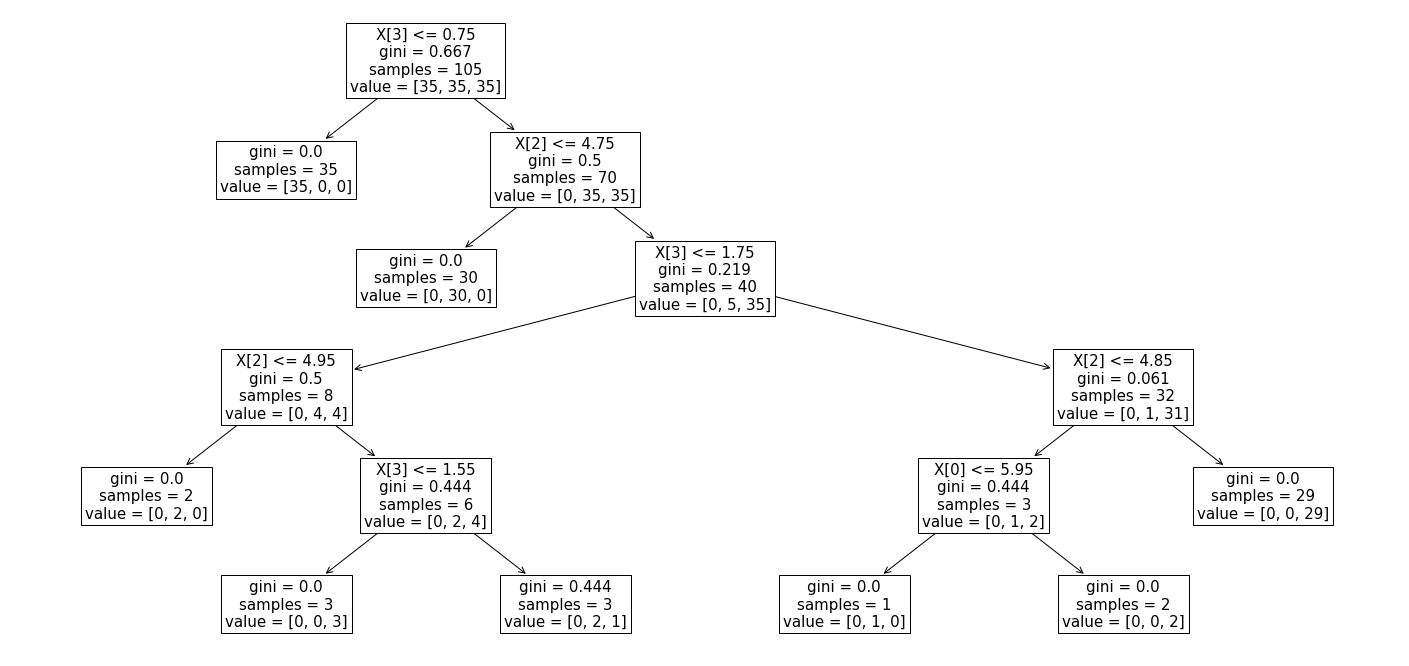

In [ ]:
import matplotlib.pyplot as plt
#tree.plot_tree(dtc.fit(X_train,y_train))
fig, ax = plt.subplots(figsize=(25, 12))
tree.plot_tree(dtc.fit(X_train, y_train), fontsize=15)
plt.savefig('tree_high_dpi', dpi=100)

### Tree regression

In [ ]:
#from sklearn import tree

import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))


In [ ]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

y_pred_1 = regr_1.predict(X)
y_pred_2 = regr_2.predict(X)


In [ ]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y, y_pred_1))
print(mean_squared_error(y, y_pred_2))

0.12967126328231798
0.025236948989861896


In [ ]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

y_pred_1 = regr_1.predict(X_test)
y_pred_2 = regr_2.predict(X_test)

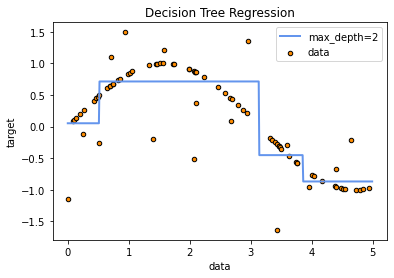

In [ ]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
#plt.plot(X_test, y_pred_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

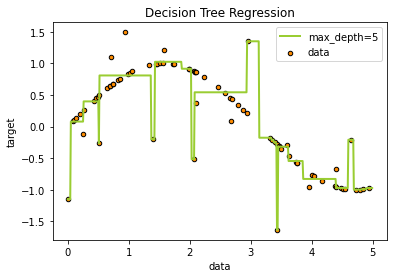

In [ ]:
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
#plt.plot(X_test, y_pred_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_pred_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()